# NASA ocean color data 


This notebook demonstrates how we can access Ocean Color data from NASA.


The main repository for NASAs ocean color data is: https://oceandata.sci.gsfc.nasa.gov/opendap/

We will look at data from the MODIS-Aqua (MODIS-A) satellite, and in particular we will look at the level 3 product, which is data that has gone through the highest level of processing and nicely gridded.


NASA organizes data by year and year day. You can see this structure by clicking through the OpenDAP server. The file used in this example contains the mapped chlorophyll-a data for July 28 (year day 210), 2019.


### credit:
this lession borrowed from Tom Connolly: https://github.com/tompc35/oceanography-notebooks/blob/master/ocean_color_netcdf.ipynb

In [1]:
# import statements

%matplotlib inline 

import numpy as np

import matplotlib.pyplot as plt

import cartopy.crs as ccrs

import pandas as pd


import xarray as xr


# use `xr.open_dataset()` to access the data

the data for yearday 210 of 2019 is located at:
```python
url = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/210/A2019210.L3m_DAY_CHL_chlor_a_4km.nc'
```


In [59]:

# url = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/210/A2019210.L3m_DAY_CHL_chlor_a_4km.nc'
url = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/Merged_ATV/L3SMI/2020/102/X2020102.L3m_DAY_CHL_chlor_a_4km.nc'

# url = files[0]
data = xr.open_dataset(url, drop_variables=['palette'])

data

<xarray.Dataset>
Dimensions:  (lat: 4320, lon: 8640, w: 1)
Coordinates:
  * w        (w) float64 1.1
  * lat      (lat) float32 89.979164 89.9375 89.895836 ... -89.93751 -89.97917
  * lon      (lon) float32 -179.97917 -179.9375 ... 179.93752 179.97917
Data variables:
    chlor_a  (w, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    product_name:                     X2020102.L3m_DAY_CHL_chlor_a_4km.nc
    project:                          Ocean Biology Processing Group (NASA/GS...
    temporal_range:                   day
    processing_version:               2018.1
    date_created:                     2020-06-24T18:31:21.000Z
    l2_flag_names:                    ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,C...
    time_coverage_start:              2020-04-10T21:20:01.000Z
    time_coverage_end:                2020-04-12T02:59:59.000Z
    start_orbit_number:               43806
    end_orbit_number:                 108063
    map_projection:                   Equidistant Cylindrical
    latitude_units:                   degrees_north
    longitude_units:                  degrees_east
    northernmost_latitude:            90.0
    southernmost_latitude:            -90.0
    westernmost_longitude:            -180.0
    easternmost_longitude:            180.0
    geospatial_lat_max:               90.0
    geospatial_lat_min:               -90.0
    geospatial_lon_max:               180.0
    geospatial_lon_min:               -180.0
    latitude_step:                    0.041666668
    longitude_step:                   0.041666668
    sw_point_latitude:                -89.979164
    sw_point_longitude:               -179.97917
    spatialResolution:                4.64 km
    geospatial_lon_resolution:        0.041666668
    geospatial_lat_resolution:        0.041666668
    geospatial_lat_units:             degrees_north
    geospatial_lon_units:             degrees_east
    number_of_lines:                  4320
    number_of_columns:                8640
    measure:                          Mean
    suggested_image_scaling_minimum:  0.01
    suggested_image_scaling_maximum:  20.0
    suggested_image_scaling_type:     LOG
    suggested_image_scaling_applied:  No
    _lastModified:                    2020-06-24T18:31:21.000Z
    Conventions:                      CF-1.6 ACDD-1.3
    institution:                      NASA Goddard Space Flight Center, Ocean...
    standard_name_vocabulary:         CF Standard Name Table v36
    naming_authority:                 gov.nasa.gsfc.sci.oceandata
    id:                               X2020102.L3b_DAY_CHL.nc/L3/X2020102.L3b...
    license:                          https://science.nasa.gov/earth-science/...
    creator_name:                     NASA/GSFC/OBPG
    publisher_name:                   NASA/GSFC/OBPG
    creator_email:                    data@oceancolor.gsfc.nasa.gov
    publisher_email:                  data@oceancolor.gsfc.nasa.gov
    creator_url:                      https://oceandata.sci.gsfc.nasa.gov
    publisher_url:                    https://oceandata.sci.gsfc.nasa.gov
    processing_level:                 L3 Mapped
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Chemistr...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    _NCProperties:                    version=2,netcdf=4.7.1,hdf5=1.10.5,
    data_bins:                        Attribute edlided: Unsupported attribut...
    data_minimum:                     0.001
    data_maximum:                     99.3876
    history:                          l3mapgen par=X2020102.L3m_DAY_CHL_chlor...
    title:                            Level-3 Mapped Data
    instrument:                       MODIS,VIIRS
    platform:                         Aqua,Terra,SNPP

# Subset the data

Again, let's just grab the mid-atlantic bight.

Note, that for some reason I don't understand, the `lat` `coords` are listed from high to low, so when you slice, you need to reverse the order, i.e. use `sel( lat=slice(41, 38))` *not* `sel( lat=slice( 38, 41)`. This is a mystery.

fill in the blanks to get a subset of the data that covers the MAB (the lat boundaries at 38 to 41 degrees, and lon boundaries are -76 to -71):

```python
data_mab_nj = data.___( lat = ___, lon = ___)
```

In [42]:
data_mab_nj = data.sel( lat=slice(41, 38), lon=slice(-76,-71))

print(data_mab_nj.nbytes/10**6)

data_mab_nj

0.035328


<xarray.Dataset>
Dimensions:  (lat: 72, lon: 120)
Coordinates:
  * lat      (lat) float32 40.979164 40.9375 40.895832 ... 38.0625 38.020832
  * lon      (lon) float32 -75.979164 -75.9375 -75.89583 ... -71.0625 -71.02083
Data variables:
    chlor_a  (lat, lon) float32 ...
Attributes:
    product_name:                     X2020102.L3m_DAY_CHL_chlor_a_4km.nc
    project:                          Ocean Biology Processing Group (NASA/GS...
    temporal_range:                   day
    processing_version:               2018.1
    date_created:                     2020-06-24T18:31:21.000Z
    l2_flag_names:                    ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,C...
    time_coverage_start:              2020-04-10T21:20:01.000Z
    time_coverage_end:                2020-04-12T02:59:59.000Z
    start_orbit_number:               43806
    end_orbit_number:                 108063
    map_projection:                   Equidistant Cylindrical
    latitude_units:                   degrees_north
    longitude_units:                  degrees_east
    northernmost_latitude:            90.0
    southernmost_latitude:            -90.0
    westernmost_longitude:            -180.0
    easternmost_longitude:            180.0
    geospatial_lat_max:               90.0
    geospatial_lat_min:               -90.0
    geospatial_lon_max:               180.0
    geospatial_lon_min:               -180.0
    latitude_step:                    0.041666668
    longitude_step:                   0.041666668
    sw_point_latitude:                -89.979164
    sw_point_longitude:               -179.97917
    spatialResolution:                4.64 km
    geospatial_lon_resolution:        0.041666668
    geospatial_lat_resolution:        0.041666668
    geospatial_lat_units:             degrees_north
    geospatial_lon_units:             degrees_east
    number_of_lines:                  4320
    number_of_columns:                8640
    measure:                          Mean
    suggested_image_scaling_minimum:  0.01
    suggested_image_scaling_maximum:  20.0
    suggested_image_scaling_type:     LOG
    suggested_image_scaling_applied:  No
    _lastModified:                    2020-06-24T18:31:21.000Z
    Conventions:                      CF-1.6 ACDD-1.3
    institution:                      NASA Goddard Space Flight Center, Ocean...
    standard_name_vocabulary:         CF Standard Name Table v36
    naming_authority:                 gov.nasa.gsfc.sci.oceandata
    id:                               X2020102.L3b_DAY_CHL.nc/L3/X2020102.L3b...
    license:                          https://science.nasa.gov/earth-science/...
    creator_name:                     NASA/GSFC/OBPG
    publisher_name:                   NASA/GSFC/OBPG
    creator_email:                    data@oceancolor.gsfc.nasa.gov
    publisher_email:                  data@oceancolor.gsfc.nasa.gov
    creator_url:                      https://oceandata.sci.gsfc.nasa.gov
    publisher_url:                    https://oceandata.sci.gsfc.nasa.gov
    processing_level:                 L3 Mapped
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Chemistr...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    _NCProperties:                    version=2,netcdf=4.7.1,hdf5=1.10.5,
    data_bins:                        Attribute edlided: Unsupported attribut...
    data_minimum:                     0.001
    data_maximum:                     99.3876
    history:                          l3mapgen par=X2020102.L3m_DAY_CHL_chlor...
    title:                            Level-3 Mapped Data
    instrument:                       MODIS,VIIRS
    platform:                         Aqua,Terra,SNPP

# plot the chlorophyll a

for the mid atlantic bight subset using the built-in xarray plotting routine. i.e. fill in the blanks, and remember we want to just plot the variable `chlor_a`:
```python
data_mab_nj.___.___()
```



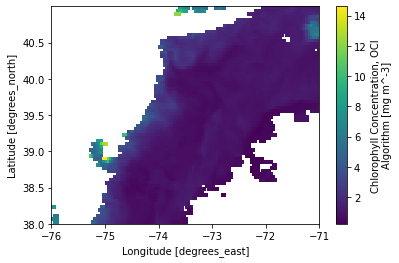

In [43]:
data_mab_nj.chlor_a.plot()

# Chla should be plotted on a log scale

Let's make the same plot with matplotlib, and use `np.log10()` to plot the data on a logarythmic scale:

```python
plt.pcolor( data_mab_nj.___, data_mab_nj.___, np.log10(data_mab_nj.___))
# add a colorbar below:
plt.___

```


/Users/beaird/anaconda3/envs/fm2020/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


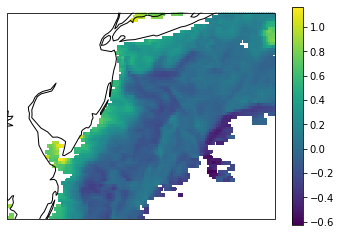

In [44]:
ax = plt.axes(projection=ccrs.Mercator())

plt.pcolor(data_mab_nj.lon, data_mab_nj.lat, np.log10(data_mab_nj.chlor_a), transform=ccrs.PlateCarree())
plt.colorbar()
ax.coastlines('50m')


# try to open multiple days

In [75]:

base_url = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019'
base_url = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/Merged_ATV/L3SMI/2019'

# pick out days, the syntax is start day, stop day, steps between
days = np.arange(10, 300, 10)

# files = [f'{base_url}/{str(day).zfill(3)}/A2019{str(day).zfill(3)}.L3m_DAY_CHL_chlor_a_4km.nc' for day in days]

files = [f'{base_url}/{str(day).zfill(3)}/X2019{str(day).zfill(3)}.L3m_DAY_CHL_chlor_a_4km.nc' for day in days]


files

['https://oceandata.sci.gsfc.nasa.gov:443/opendap/Merged_ATV/L3SMI/2019/010/X2019010.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/Merged_ATV/L3SMI/2019/020/X2019020.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/Merged_ATV/L3SMI/2019/030/X2019030.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/Merged_ATV/L3SMI/2019/040/X2019040.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/Merged_ATV/L3SMI/2019/050/X2019050.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/Merged_ATV/L3SMI/2019/060/X2019060.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/Merged_ATV/L3SMI/2019/070/X2019070.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/Merged_ATV/L3SMI/2019/080/X2019080.L3m_DAY_CHL_chlor_a_4km.nc',
 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/Merged_ATV/L3SMI/2019/090/X2019090.L3m

In [71]:
# pd.to_datetime( ds.time_coverage_start)

Timestamp('2019-01-09 21:50:00+0000', tz='UTC')

In [ ]:
# only concat the chla, then only grab it, and subset to MAB:

# need to add a dim to concatinate? I dont know why
def preproc(ds):
    ds = ds.expand_dims({'time': [ds.time_coverage_start]})
    return ds

ds = xr.open_mfdataset(files,  preprocess=preproc, drop_variables='palette', parallel=False).sel( 
    lat=slice(41, 38), lon=slice(-76,-71))
# 
# ds = ds.rename({'concat_dim': 'days'})
print('data size:',ds.nbytes/1e6, 'MB')
ds

In [83]:
ds.chlor_a.mean(dim='time').plot()


KeyboardInterrupt: 

Signature: xr.cov(da_a, da_b, dim=None, ddof=1)
Docstring:
Compute covariance between two DataArray objects along a shared dimension.

Parameters
----------
da_a: DataArray object
    Array to compute.
da_b: DataArray object
    Array to compute.
dim : str, optional
    The dimension along which the covariance will be computed
ddof: int, optional
    If ddof=1, covariance is normalized by N-1, giving an unbiased estimate,
    else normalization is by N.

Returns
-------
covariance: DataArray

See also
--------
pandas.Series.cov: corresponding pandas function
xr.corr: respective function to calculate correlation

Examples
--------
>>> da_a = DataArray(
...     np.array([[1, 2, 3], [0.1, 0.2, 0.3], [3.2, 0.6, 1.8]]),
...     dims=("space", "time"),
...     coords=[
...         ("space", ["IA", "IL", "IN"]),
...         ("time", pd.date_range("2000-01-01", freq="1D", periods=3)),
...     ],
... )
>>> da_a
<xarray.DataArray (space: 3, time: 3)>
array([[1. , 2. , 3. ],
       [0.1, 0.2, 0.3